Dvir & Avishay

Part 1 - Importing All Related Packages

In [1]:
#loading modules
from sklearn.linear_model import LogisticRegression
from sortedcontainers import SortedSet
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
from sklearn.metrics import accuracy_score, f1_score,classification_report
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import nltk
from sklearn.ensemble import RandomForestClassifier
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet') in
#nltk.download('omw-1.4')
import collections
import warnings
warnings.filterwarnings('ignore')

Loading the DataSet and viewing its basic properties

In [2]:
df = pd.read_csv("spam_ham_dataset.csv")
print(df.columns)
print(df.describe())
print (df["text"])

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')
        Unnamed: 0    label_num
count  5171.000000  5171.000000
mean   2585.000000     0.289886
std    1492.883452     0.453753
min       0.000000     0.000000
25%    1292.500000     0.000000
50%    2585.000000     0.000000
75%    3877.500000     1.000000
max    5170.000000     1.000000
0       Subject: enron methanol ; meter # : 988291\r\n...
1       Subject: hpl nom for january 9 , 2001\r\n( see...
2       Subject: neon retreat\r\nho ho ho , we ' re ar...
3       Subject: photoshop , windows , office . cheap ...
4       Subject: re : indian springs\r\nthis deal is t...
                              ...                        
5166    Subject: put the 10 on the ft\r\nthe transport...
5167    Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168    Subject: calpine daily gas nomination\r\n>\r\n...
5169    Subject: industrial worksheets for august 2000...
5170    Subject: important online banking alert\r\ndea...
Name: 

Splitting the Dataframe to 2 categories - Spam and Ham (to specify the top 10 words)

In [3]:
spam_df = df[df['label'] == 'spam'] #create sub-dataframe of spam text
ham_df = df[df['label'] == 'ham'] #sub-dataframe of ham text

Initiating the pre-processing - Lowering,removing punctuation and unrelevant characters using regex

In [8]:
stop_words = set(stopwords.words('english'))
def tokenize(text):
    regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]') #remove punctuation
    text = regex.sub(' ', text)
    tokens = nltk.word_tokenize(text) # tokenize the text
    tokens = list(filter(lambda x: x.lower() not in stop_words, tokens)) # remove stop words
    tokens = [w.lower() for w in tokens if len(w) >=3] 
    tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
    return tokens

In [9]:
spam_df['tokens'] = spam_df['text'].map(tokenize)
ham_df['tokens'] = ham_df['text'].map(tokenize)
df['tokens2']=df['text'].map(tokenize)

<h5>Most Common Words + Building the Corpus(es)

In [10]:
# most common words
spam_words = []
for token in spam_df['tokens']:
    spam_words = spam_words + token #combine text in different columns in one list
ham_words = []
for token in ham_df['tokens']:
    ham_words += token
total_words = []
for token in df['tokens2']:
    total_words += token
    
spam_count = collections.Counter(spam_words).most_common(10)
ham_count = collections.Counter(ham_words).most_common(10)
total_count=collections.Counter(total_words).most_common(10)

spam_count_df = pd.DataFrame(spam_count, columns = ['word', 'count'])
ham_count_df = pd.DataFrame(ham_count, columns = ['word', 'count'])
total_count_df=pd.DataFrame(total_count,columns=['word','count'])

Viewing the most common words using Seaborn and Matplotlib

Text(0.5, 1.0, 'ham top 10 words')

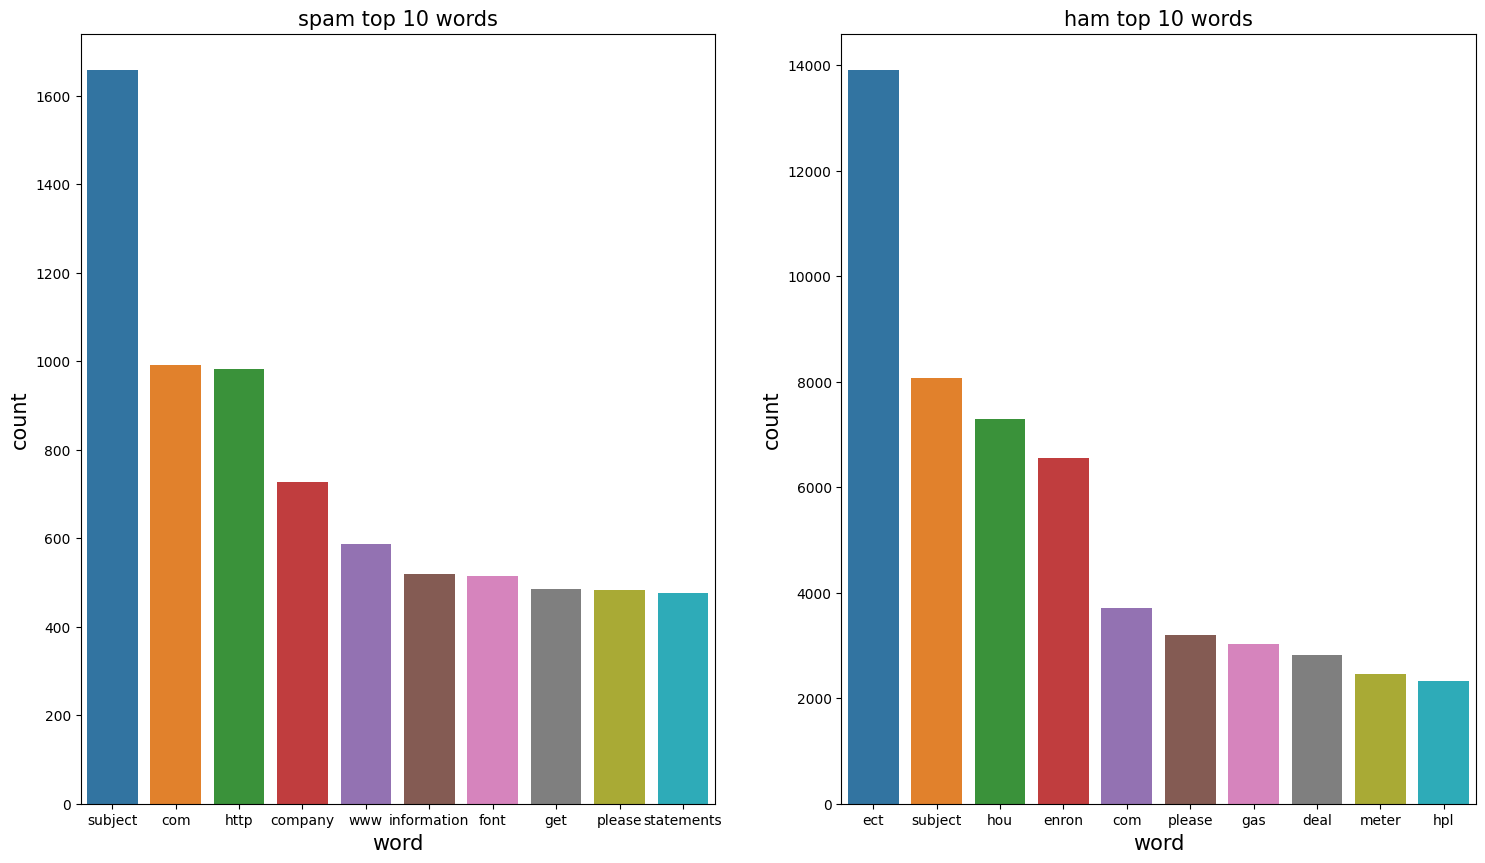

In [11]:
fig, (ax,ax1) = plt.subplots(1,2,figsize = (18, 10))
# for spam_count_df (spam words and there count)
sns.barplot(x = spam_count_df['word'], y = spam_count_df['count'], ax = ax)
ax.set_ylabel('count', fontsize = 15)
ax.set_xlabel('word',fontsize = 15)
ax.tick_params(labelsize=10)
ax.set_title('spam top 10 words', fontsize = 15)
# for ham_count_df (ham words and there count)
sns.barplot(x = total_count_df['word'], y = total_count_df['count'], ax = ax1)
ax1.set_ylabel('count', fontsize = 15)
ax1.set_xlabel('word',fontsize = 15)
ax1.tick_params(labelsize=10)
ax1.set_title('ham top 10 words', fontsize = 15)

PROCESSING THE DATA - Tokenzing

In [12]:
df['tokens'] = df['text'].map(tokenize)

In [13]:
def text_join(text):
    return " ".join(text)
df['text'] = df['tokens'].apply(text_join)
df.head()

,Unnamed: 0,label,text,label_num,tokens2,tokens
0,605,ham,subject enron methanol meter follow note gave ...,0,"[subject, enron, methanol, meter, follow, note...","[subject, enron, methanol, meter, follow, note..."
1,2349,ham,subject hpl nom january see attached file hpln...,0,"[subject, hpl, nom, january, see, attached, fi...","[subject, hpl, nom, january, see, attached, fi..."
2,3624,ham,subject neon retreat around wonderful time yea...,0,"[subject, neon, retreat, around, wonderful, ti...","[subject, neon, retreat, around, wonderful, ti..."
3,4685,spam,subject photoshop windows office cheap main tr...,1,"[subject, photoshop, windows, office, cheap, m...","[subject, photoshop, windows, office, cheap, m..."
4,2030,ham,subject indian springs deal book teco pvr reve...,0,"[subject, indian, springs, deal, book, teco, p...","[subject, indian, springs, deal, book, teco, p..."


In [14]:

word=SortedSet()#putting all tokens in 1 set
textlist=[]
for w in df['tokens']:
    word.update(w)
for w in df['text']:
    textlist.append(w)

Using TFIDF Method

In [15]:
tv = TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english")
features = tv.fit_transform(textlist)

In [16]:
print(features)

  (0, 5173)	0.2148989536740921
  (0, 2168)	0.25561138164049474
  (0, 410)	0.20349151556132064
  (0, 4362)	0.16682244302628554
  (0, 1112)	0.13140631900198776
  (0, 1536)	0.17200718763887002
  (0, 2832)	0.09651146857065186
  (0, 4472)	0.24005109763027316
  (0, 75)	0.17450003670166123
  (0, 5338)	0.19933866966387048
  (0, 7089)	0.18248830174498926
  (0, 5014)	0.2148989536740921
  (0, 6854)	0.1262399944638329
  (0, 1715)	0.23977947475089467
  (0, 4928)	0.24620446847335883
  (0, 4610)	0.2918564014373499
  (0, 1727)	0.1002671352245315
  (0, 5141)	0.1837783856536489
  (0, 1736)	0.17689103434921138
  (0, 2692)	0.1350975100377642
  (0, 4994)	0.22401993185552396
  (0, 4263)	0.15972031619019433
  (0, 2839)	0.2171794095774341
  (0, 4436)	0.1576730904388808
  (0, 2706)	0.17224931072801522
  :	:
  (5170, 37)	0.2531340822678481
  (5170, 5501)	0.10751755727174696
  (5170, 1442)	0.15714396257188432
  (5170, 5806)	0.06570701116323616
  (5170, 2473)	0.10405112490988534
  (5170, 6916)	0.10110029087496963

In [17]:
X = features
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Decision Tree Classifier + Logistic Regression

In [18]:
from sklearn.metrics import f1_score
dtc = DecisionTreeClassifier(random_state=10)
dtc.fit(X_train, y_train) #fitting train
y_pred_train = dtc.predict(X_train)
report_train=classification_report(y_train, y_pred_train,output_dict=True)
data={'TFIDF_DTC_TRAIN':[report_train['0']['f1-score'],report_train['1']['f1-score']]}
results=pd.DataFrame(data)

In [19]:
y_pred_test=dtc.predict(X_test) #Prediction
report_test=classification_report(y_test,y_pred_test,output_dict=True)
new_col=pd.Series([report_train['0']['f1-score'],report_train['1']['f1-score']],name='TFIDF-DTC-TEST',index=[0,1])
data={'TFIDF-DTC-TEST':[report_test['0']['f1-score'],report_test['1']['f1-score']]}
results=results.assign(TFIDF_DTC_TEST=[report_test['0']['f1-score'],report_test['1']['f1-score']])

Using Logistic Regression - Fit + Train

In [20]:
lr=LogisticRegression(random_state=10,C=5,max_iter=1000)
lr.fit(X_train,y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr=lr.predict(X_test)
report_train=classification_report(y_train,y_pred_train_lr,output_dict=True)
report_test=classification_report(y_test,y_pred_test_lr,output_dict=True)
results=results.assign(TFIDF_LR_TRAIN=[report_train['0']['f1-score'],report_train['1']['f1-score']])
results=results.assign(TFIDF_LR_TEST=[report_test['0']['f1-score'],report_test['1']['f1-score']])


BAG OF WORDS Method - Decision Tree Classifier + Logistic Regression

In [21]:
def calculate_bow(wordset, l_doc):
    tf_diz = dict.fromkeys(wordset,0)
    for word in l_doc:
        tf_diz[word]=l_doc.count(word)
    return tf_diz

In [22]:
wordset=SortedSet()
for line in df['tokens']:
    wordset.update(line)

In [23]:
bow = []
for tok in df['tokens']:
    bow.append(calculate_bow(wordset, tok))
df_bow = pd.DataFrame(bow)

In [24]:
df_bow.describe()
cv=CountVectorizer(vocabulary=wordset) #Presenting the features
cv.get_feature_names_out

<bound method CountVectorizer.get_feature_names_out of CountVectorizer(vocabulary=SortedSet(['aaa', 'aaas', 'aabda', 'aabvmmq', 'aac', 'aachecar', 'aaer', 'aafco', 'aaiabe', 'aaigrcrb', 'aaihmqv', 'aaldano', 'aalland', 'aambique', 'aamlrg', 'aaoeuro', 'aare', 'aarhus', 'aaron', 'aashqcsny', 'aavilable', 'aaxrzm', 'aba', 'ababa', 'abacha', 'aback', 'abackof', 'abacus', 'abacustech', 'abandon', 'abandone', 'abandoned', 'abarch', 'abasem...zvp', 'zvrkxjmex', 'zvx', 'zwallet', 'zwdm', 'zwftnqlp', 'zwiers', 'zwmdjvr', 'zwoegen', 'zwu', 'zxaghur', 'zxgwvpiadobe', 'zxgwvpihere', 'zxgwvpiimg', 'zxgwvpimacromedia', 'zxgwvpimicrosoft', 'zxgwvpinorton', 'zxjcxz', 'zxklh', 'zxzmcnbf', 'zyban', 'zyjvit', 'zykfe', 'zyl', 'zynsdirnh', 'zynve', 'zyqtaqlt', 'zyrtec', 'zyyqywp', 'zzezrjok', 'zzn', 'zzo', 'zzocb', 'zzso', 'zzsyt']))>

In [25]:
X = cv.fit_transform(df['text'])
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [26]:
dtc2 = DecisionTreeClassifier(random_state=10)
dtc2.fit(X_train, y_train) #fitting train and then test
y_pred_train = dtc2.predict(X_train)
y_pred_test=dtc2.predict(X_test)
report_train=classification_report(y_train,y_pred_train,output_dict=True)
report_test=classification_report(y_test,y_pred_test,output_dict=True)
results=results.assign(BOW_DTC_TRAIN=[report_train['0']['f1-score'],report_train['1']['f1-score']])
results=results.assign(BOW_DTC_TEST=[report_test['0']['f1-score'],report_test['1']['f1-score']])

In [27]:
lr=LogisticRegression(random_state=10,C=5,max_iter=1000)
lr.fit(X_train,y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr=lr.predict(X_test)
report_train=classification_report(y_train,y_pred_train_lr,output_dict=True)
report_test=classification_report(y_test,y_pred_test_lr,output_dict=True)
results=results.assign(BOW_LR_TRAIN=[report_train['0']['f1-score'],report_train['1']['f1-score']])
results=results.assign(BOW_LR_TEST=[report_test['0']['f1-score'],report_test['1']['f1-score']])
print ("F1-Scores for each Iteration")
results.index=['HAM','SPAM']
print(results)

F1-Scores for each Iteration
      TFIDF_DTC_TRAIN  TFIDF_DTC_TEST  TFIDF_LR_TRAIN  TFIDF_LR_TEST  \
HAM          0.999829        0.970728        0.999147       0.993915   
SPAM         0.999585        0.928453        0.997928       0.984772   

      BOW_DTC_TRAIN  BOW_DTC_TEST  BOW_LR_TRAIN  BOW_LR_TEST  
HAM             1.0      0.963710           1.0     0.985095  
SPAM            1.0      0.907216           1.0     0.962963  


Answer for Question 9:
According to the DF above, it looks like both methods (BOW and TFIDF) give similar results using Logistic Regression and DTC although by a little, the TFIDF+LR combo offers the best f1-score compared to the other combos tested. reason for that is probably due to the great number of tokens and their frequency.
as we've learnt - the token and its frequency in our corpus are both taken into consideration when using TFIDF, moreover, the given dataset's relevancy as to mail is true spam seems to be very high, that in fact ultimately supports the classification reports that have been generated.

